# EDA on ticket transactions data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Pull the data

df = pd.read_csv("ticket_trans_Nov_Jan.csv",  delimiter=';')

### We want to see the first/last 5 rows of the dataset to know the range of the Date issue. We notice that it is around 3 months.

In [3]:
df.head()
df.tail()

,Date_Issued,Device_ID,Ticket_Number,Route,Zone,From_Stop,To_Zone,Passenger_Type,Price,Payment_method,Ticket_Type
21214,25/1/2023 10:55,K50200241,116-000-41-146-196,05-ΚΟΥΡΑΜΑΔΕΣ - ΚΥΝΟΠΙΑΣΤΕΣ - ΜΕΘΟΔΙΟΥ (ΠΟΛΗ),ZONE B,ΠΕΡΔΙΚΟΜΑΤΗ,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B
21215,25/1/2023 10:55,K42200162,116-000-68-165-810,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΓΕΝΙΚΟ ΝΟΣΟΚΟΜΕΙΟ-ΚΟΝΤΟΚΑΛΙ E,ZONE B,NORMAL,"1,7",CASH,REGULAR ZONE A
21216,25/1/2023 10:57,K42200162,116-000-68-165-809,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ELEA BEACH HOTEL E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B
21217,25/1/2023 10:59,K42200169,116-000-80-150-1676,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΥΨΟΣ Ε,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B
21218,25/1/2023 11:02,K42200169,116-000-80-150-1675,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΛΙΜΑΝΑΚΙ E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B


### We will use the describe method to get a first view of some basic metrics of the dataset.

In [4]:
df.describe()

,Date_Issued,Device_ID,Ticket_Number,Route,Zone,From_Stop,To_Zone,Passenger_Type,Price,Payment_method,Ticket_Type
count,21219,21219,21219,21219,21219,21217,21219,21219,21219,21219,21219
unique,15011,28,21219,59,2,369,2,2,4,1,4
top,24/1/2023 13:33,K43200220,116-000-76-157-471,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE A,ΚΑΝΑΛΙΑ JUMBO E,ZONE A,NORMAL,"1,7",CASH,REGULAR ZONE A
freq,10,2165,1,4970,12989,647,12989,17310,10378,21219,10378


In [5]:
# We will drop the Ticket Number Column as it doesnt help us anywhere in the dataset

df.drop(['Ticket_Number'], axis=1)

,Date_Issued,Device_ID,Route,Zone,From_Stop,To_Zone,Passenger_Type,Price,Payment_method,Ticket_Type
0,25/11/2022 6:24,K42200173,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΜΑΓΚΙΟΡΟΥ E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B
1,25/11/2022 7:01,K42200173,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΜΑΓΚΙΟΡΟΥ E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B
2,25/11/2022 7:06,K41200147,11-ΣΑΡΟΚΟ (ΠΟΛΗ) - ΑΦΡΑ - ΑΓ. ΙΩΑΝΝΗΣ - ΜΟΥΧΑ,ZONE B,AQUALAND E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B
3,25/11/2022 7:07,K41200147,11-ΣΑΡΟΚΟ (ΠΟΛΗ) - ΑΦΡΑ - ΑΓ. ΙΩΑΝΝΗΣ - ΜΟΥΧΑ,ZONE B,AQUALAND E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B
4,25/11/2022 7:15,K50200223,2A-ΚΑΝΟΝΙ - ΑΝΩ ΠΛΑΤΕΙΑ (ΛΙΣΤΟΝ),ZONE A,ΠΛΑΤΕΙΑ ΣΑΡΟΚΟΥ ΓΡΑΜΜΗ 2Α,ZONE A,NORMAL,"1,7",CASH,REGULAR ZONE A
...,...,...,...,...,...,...,...,...,...,...
21214,25/1/2023 10:55,K50200241,05-ΚΟΥΡΑΜΑΔΕΣ - ΚΥΝΟΠΙΑΣΤΕΣ - ΜΕΘΟΔΙΟΥ (ΠΟΛΗ),ZONE B,ΠΕΡΔΙΚΟΜΑΤΗ,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B
21215,25/1/2023 10:55,K42200162,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΓΕΝΙΚΟ ΝΟΣΟΚΟΜΕΙΟ-ΚΟΝΤΟΚΑΛΙ E,ZONE B,NORMAL,"1,7",CASH,REGULAR ZONE A
21216,25/1/2023 10:57,K42200162,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ELEA BEACH HOTEL E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B
21217,25/1/2023 10:59,K42200169,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΥΨΟΣ Ε,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B


In [6]:
#We check to see the types of each variable, we notice that the Date Issued column is an object, so we need to convert it

df.dtypes

df['Date_Issued'] = pd.to_datetime(df['Date_Issued'])

df.dtypes

Date_Issued       datetime64[ns]
Device_ID                 object
Ticket_Number             object
Route                     object
Zone                      object
From_Stop                 object
To_Zone                   object
Passenger_Type            object
Price                     object
Payment_method            object
Ticket_Type               object
dtype: object

In [7]:
#We check to see some basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21219 entries, 0 to 21218
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date_Issued     21219 non-null  datetime64[ns]
 1   Device_ID       21219 non-null  object        
 2   Ticket_Number   21219 non-null  object        
 3   Route           21219 non-null  object        
 4   Zone            21219 non-null  object        
 5   From_Stop       21217 non-null  object        
 6   To_Zone         21219 non-null  object        
 7   Passenger_Type  21219 non-null  object        
 8   Price           21219 non-null  object        
 9   Payment_method  21219 non-null  object        
 10  Ticket_Type     21219 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1.8+ MB


### We will add the Columns Month, Day, Hour of the transactions so we can better understand the data

In [8]:
df['Month'] = pd.DatetimeIndex(df['Date_Issued']).month
df['Day'] = pd.DatetimeIndex(df['Date_Issued']).day
df['Hour'] = pd.DatetimeIndex(df['Date_Issued']).hour

df

,Date_Issued,Device_ID,Ticket_Number,Route,Zone,From_Stop,To_Zone,Passenger_Type,Price,Payment_method,Ticket_Type,Month,Day,Hour
0,2022-11-25 06:24:00,K42200173,116-000-66-162-1774,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΜΑΓΚΙΟΡΟΥ E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B,11,25,6
1,2022-11-25 07:01:00,K42200173,116-000-66-162-1773,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΜΑΓΚΙΟΡΟΥ E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B,11,25,7
2,2022-11-25 07:06:00,K41200147,116-000-80-157-3459,11-ΣΑΡΟΚΟ (ΠΟΛΗ) - ΑΦΡΑ - ΑΓ. ΙΩΑΝΝΗΣ - ΜΟΥΧΑ,ZONE B,AQUALAND E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B,11,25,7
3,2022-11-25 07:07:00,K41200147,116-000-80-157-3458,11-ΣΑΡΟΚΟ (ΠΟΛΗ) - ΑΦΡΑ - ΑΓ. ΙΩΑΝΝΗΣ - ΜΟΥΧΑ,ZONE B,AQUALAND E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B,11,25,7
4,2022-11-25 07:15:00,K50200223,116-000-10-163-316,2A-ΚΑΝΟΝΙ - ΑΝΩ ΠΛΑΤΕΙΑ (ΛΙΣΤΟΝ),ZONE A,ΠΛΑΤΕΙΑ ΣΑΡΟΚΟΥ ΓΡΑΜΜΗ 2Α,ZONE A,NORMAL,"1,7",CASH,REGULAR ZONE A,11,25,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21214,2023-01-25 10:55:00,K50200241,116-000-41-146-196,05-ΚΟΥΡΑΜΑΔΕΣ - ΚΥΝΟΠΙΑΣΤΕΣ - ΜΕΘΟΔΙΟΥ (ΠΟΛΗ),ZONE B,ΠΕΡΔΙΚΟΜΑΤΗ,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B,1,25,10
21215,2023-01-25 10:55:00,K42200162,116-000-68-165-810,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΓΕΝΙΚΟ ΝΟΣΟΚΟΜΕΙΟ-ΚΟΝΤΟΚΑΛΙ E,ZONE B,NORMAL,"1,7",CASH,REGULAR ZONE A,1,25,10
21216,2023-01-25 10:57:00,K42200162,116-000-68-165-809,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ELEA BEACH HOTEL E,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B,1,25,10
21217,2023-01-25 10:59:00,K42200169,116-000-80-150-1676,07-ΥΨΟΣ - ΣΑΡΟΚΟ (ΠΟΛΗ),ZONE B,ΥΨΟΣ Ε,ZONE B,NORMAL,"2,3",CASH,REGULAR ZONE A & B,1,25,10


### Question 1: How many transactions are made on each stop?

In [9]:
stops = df.groupby(by=['From_Stop'], as_index=False)['Ticket_Number'].count()
stops


,From_Stop,Ticket_Number
0,1Η ΠΕΡΟΥΛΑΚΗ E,4
1,1ο - 5ο ΓΥΜΝΑΣΙΟ,88
2,2ο ΓΥΜΝΑΣΙΟ,4
3,AQUALAND E,157
4,BELLOS BEACH HOTEL E,159
...,...,...
364,ΧΟΝΔΡΟΓΙΑΝΝΗ,3
365,ΧΟΝΔΡΟΓΙΑΝΝΗ E,6
366,ΨΑΘΑ,6
367,ΨΑΘΑ E,204


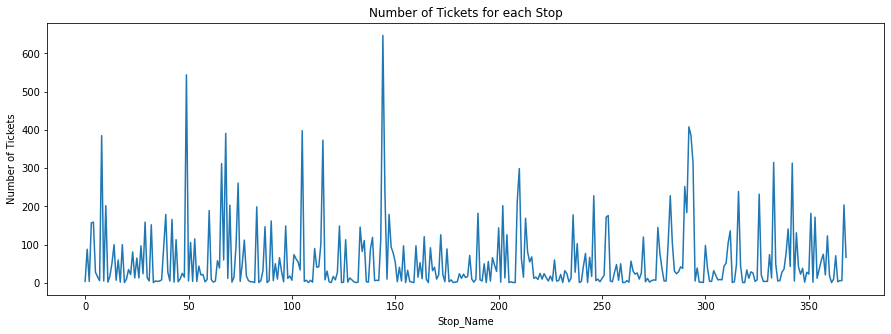

In [10]:
plt.subplots(figsize=(15,5))
plt.plot(stops.Ticket_Number)
plt.xlabel('Stop_Name')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets for each Stop')
plt.show()

### Question 2: Which are the Top 5 stops with the most ticket transactions?

In [11]:
stops.sort_values(by='Ticket_Number', ascending=False).head()

,From_Stop,Ticket_Number
144,ΚΑΝΑΛΙΑ JUMBO E,647
49,ΑΝΩ ΠΛΑΤΕΙΑ - ΛΙΣΤΟΝ,544
292,"ΠΛΑΤΕΙΑ ΣΑΡΟΚΟΥ ΓΡΑΜΜΗ 4, 7",408
105,ΔΙΑΣΤΑΥΡΩΣΗ ΚΑΣΤΕΛΛΑΝΟΙ,398
68,ΓΕΝΙΚΟ ΝΟΣΟΚΟΜΕΙΟ-ΚΟΝΤΟΚΑΛΙ E,391


### Question 3: Which ticket type sells the most overall?

Text(0.5, 1.0, 'Distribution of ticket types')

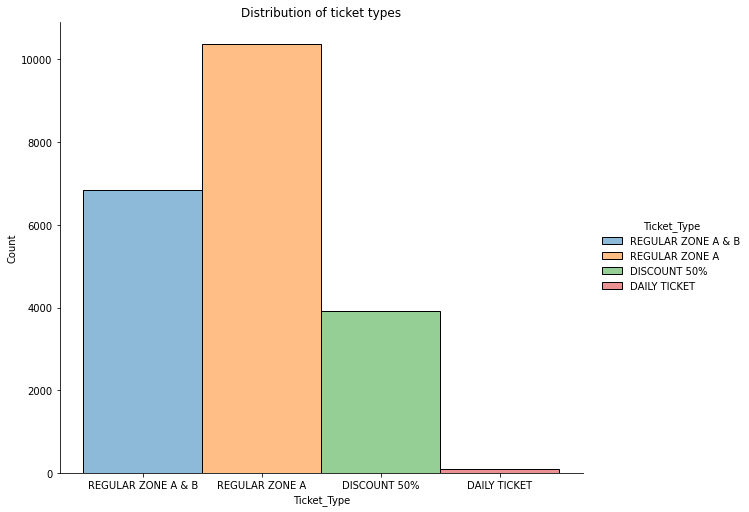

In [12]:
sns.displot(data=df, x='Ticket_Type', hue='Ticket_Type', height=7, aspect=1.2)
plt.title('Distribution of ticket types')

#### We notice that the regular ticket type (REGULAR ZONE A) is the most sold overall, while the Daily Ticket (which is the most expensive one) is the least sold type of ticket.

### Question 3: How many tickets are sold on each ZONE of the City?

#### We know that the city has 2 Zones.
- Zone A which involves low distance trips in the center of town
- Zone B which invloves long distance trips including destinations outside the town

Text(0.5, 1.0, 'Distribution of Zones')

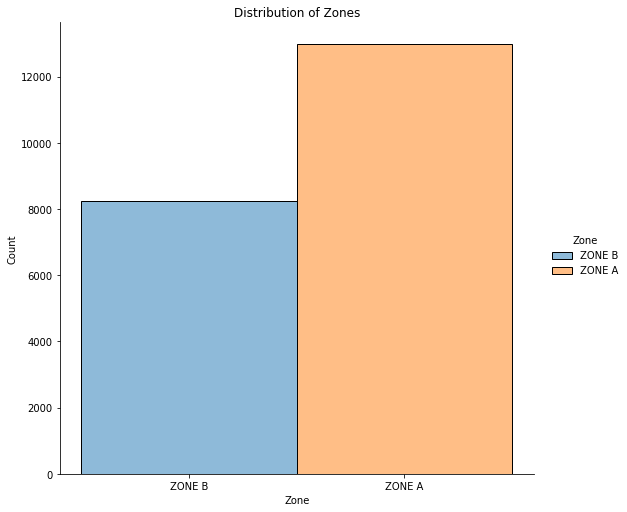

In [13]:
sns.displot(data=df, x='Zone', hue='Zone', height=7, aspect=1.1)
plt.title('Distribution of Zones')

#### We notice that Zone A has more tickets sold. This means that smaller and more frequent trips in the center of the town  carry more people that the long distanced trips.

### Question 4: Which hours have the most tickets issued? (rush hours)

<AxesSubplot:xlabel='Hour', ylabel='Ticket_Number'>

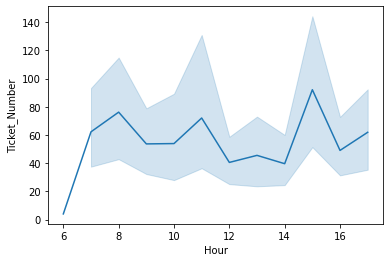

In [14]:
sns.lineplot(data=df, x="Hour", y=stops.Ticket_Number)


#### We notice that the rush hours are between 14:00 and 16:00 pm

### Question 5: Which are the top 10 Route Destinations with the most ticket transactions?


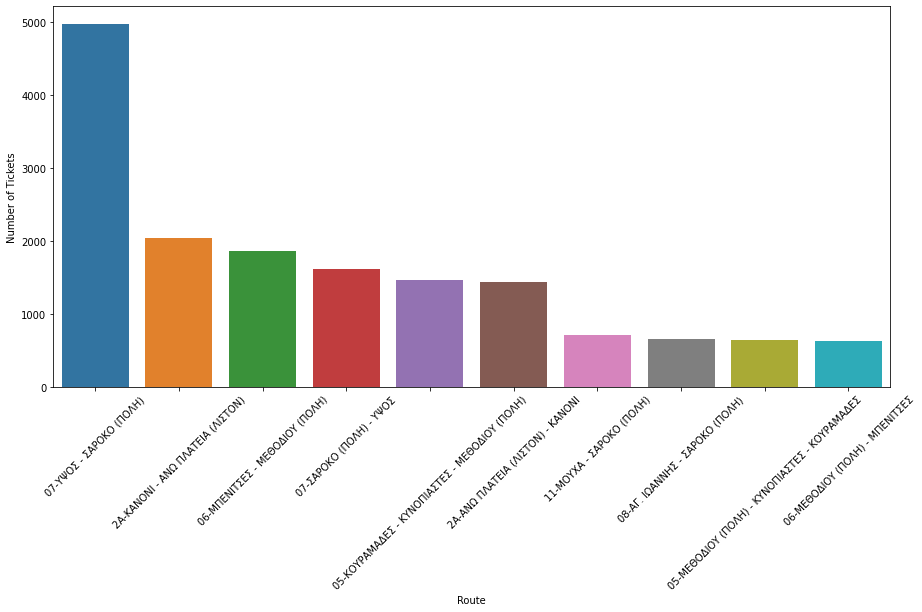

In [15]:

top_10 = df['Route'].value_counts().head(10)

plt.figure(figsize=(15, 7))
sns.countplot(x='Route', data=df, order=top_10.index)


plt.xlabel('Route')
plt.ylabel('Number of Tickets')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=45)

plt.show()

We can clearly see that the most used route with the most issued tickets is the <b>07</b> Route

### Question 6 : What type of Ticket sells the most?

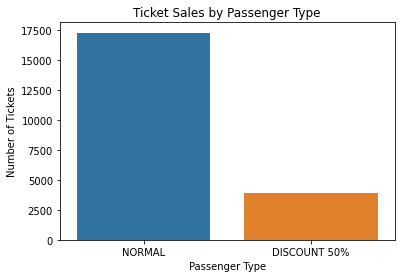

In [16]:
sns.countplot(x='Passenger_Type', data=df)
plt.xlabel('Passenger Type')
plt.ylabel('Number of Tickets')
plt.title('Ticket Sales by Passenger Type')
plt.show()